# Text-Mining Assignment : Perform sentimental analysis on the Elon-musk tweets 

***Importing libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import matplotlib.pyplot as plt
import seaborn as sns

***Loading DataSet***

In [2]:
elon_musk_df = pd.read_csv('Elon_musk.csv',encoding='latin1')

In [3]:
elon_musk_df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
elon_musk_df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
elon_musk_df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# EDA of Elon Musk DataSet

In [6]:
elon_musk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [7]:
elon_musk_df.isna().sum()

Text    0
dtype: int64

In [8]:
#Converting column name in lower case
elon_musk_df = elon_musk_df.rename({'Text': 'tweets'}, axis=1)
elon_musk_df

,tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# EDA

***Number of Words***

In [9]:
elon_musk_df['word_count'] = elon_musk_df['tweets'].apply(lambda x: len(str(x).split(" ")))
elon_musk_df[['tweets','word_count']].head(10)

,tweets,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7
6,"Frodo was the underdoge,\nAll thought he would...",12
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11
9,The most entertaining outcome is the most likely,8


***Number of characters***

In [10]:
elon_musk_df['char_count'] = elon_musk_df['tweets'].str.len() ## this also includes spaces
elon_musk_df.head(10)

,tweets,word_count,char_count
0,@kunalb11 Im an alien,4,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82
2,@joerogan @Spotify Great interview!,4,35
3,@gtera27 Doge is underestimated,4,31
4,@teslacn Congratulations Tesla China for amazi...,17,104
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49
6,"Frodo was the underdoge,\nAll thought he would...",12,96
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89
9,The most entertaining outcome is the most likely,8,48


***Number of stop words***

In [11]:
from nltk.corpus import stopwords

stop_df  = pd.read_csv('stop.csv')
stop = np.array(stop_df['stop_words'])
stop

array(['a', "a's", 'able', 'about', 'above', 'according', 'accordingly',
       'across', 'actually', 'after', 'afterwards', 'again', 'against',
       "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along',
       'already', 'also', 'although', 'always', 'am', 'among', 'amongst',
       'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone',
       'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear',
       'appreciate', 'appropriate', 'are', "aren't", 'around', 'as',
       'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away',
       'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes',
       'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
       'believe', 'below', 'beside', 'besides', 'best', 'better',
       'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon",
       "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes',
       'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come',


In [12]:
elon_musk_df['stopwords'] = elon_musk_df['tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
elon_musk_df[['tweets','stopwords']].head(10)

,tweets,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,8
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,2
6,"Frodo was the underdoge,\nAll thought he would...",6
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),1
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,3
9,The most entertaining outcome is the most likely,5


***Number of Positive words***

In [13]:
positive_df  = pd.read_csv('positive-words.csv',header=None)
positive_df

,0
0,a+
1,abound
2,abounds
3,abundance
4,abundant
...,...
2001,youthful
2002,zeal
2003,zenith
2004,zest


In [14]:
positive = np.array(positive_df[0])
positive

array(['a+', 'abound', 'abounds', ..., 'zenith', 'zest', 'zippy'],
      dtype=object)

In [15]:
elon_musk_df['postive_words'] = elon_musk_df['tweets'].apply(lambda x: len([x for x in x.split() if x in positive]))
elon_musk_df[['tweets','postive_words']].head(10)

,tweets,postive_words
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,1
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0
9,The most entertaining outcome is the most likely,1


In [16]:
elon_musk_df[['tweets','postive_words']].tail(10)

,tweets,postive_words
1989,"@buzzindelhi Sorry, should hopefully be soon!",0
1990,"@kenyanwalstreet Not actually a payout, just a...",0
1991,@IheartTesla No easy way to answer this in a t...,2
1992,AI symbiosis while u wait,0
1993,@vistacruiser7 @flcnhvy Theres some of that too,0
1994,"@flcnhvy True, it sounds so surreal, but the n...",1
1995,@PPathole Make sure to read ur terms &amp; con...,0
1996,@TeslaGong @PPathole Samwise Gamgee,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0
1998,Progress update August 28,0


***Number of Negative words***

In [17]:
negative_df  = pd.read_csv('negative-words.csv', encoding='ISO-8859–1',header=None)
negative_df

,0
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable
...,...
4778,zaps
4779,zealot
4780,zealous
4781,zealously


In [18]:
negative = np.array(negative_df[0])
negative

array(['2-faced', '2-faces', 'abnormal', ..., 'zealous', 'zealously',
       'zombie'], dtype=object)

In [19]:
elon_musk_df['negative_words'] = elon_musk_df['tweets'].apply(lambda x: len([x for x in x.split() if x in negative]))
elon_musk_df[['tweets','negative_words']].head(10)

,tweets,negative_words
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0
9,The most entertaining outcome is the most likely,0


In [20]:
elon_musk_df[['tweets','negative_words']].tail(10)

,tweets,negative_words
1989,"@buzzindelhi Sorry, should hopefully be soon!",0
1990,"@kenyanwalstreet Not actually a payout, just a...",0
1991,@IheartTesla No easy way to answer this in a t...,1
1992,AI symbiosis while u wait,0
1993,@vistacruiser7 @flcnhvy Theres some of that too,0
1994,"@flcnhvy True, it sounds so surreal, but the n...",2
1995,@PPathole Make sure to read ur terms &amp; con...,0
1996,@TeslaGong @PPathole Samwise Gamgee,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0
1998,Progress update August 28,0


***Total number of Tweets in the available DataFrame***

In [21]:
# Total tweets
print('Total tweets :', len(elon_musk_df.index), '\n')

Total tweets : 1999 



# Data Visualization

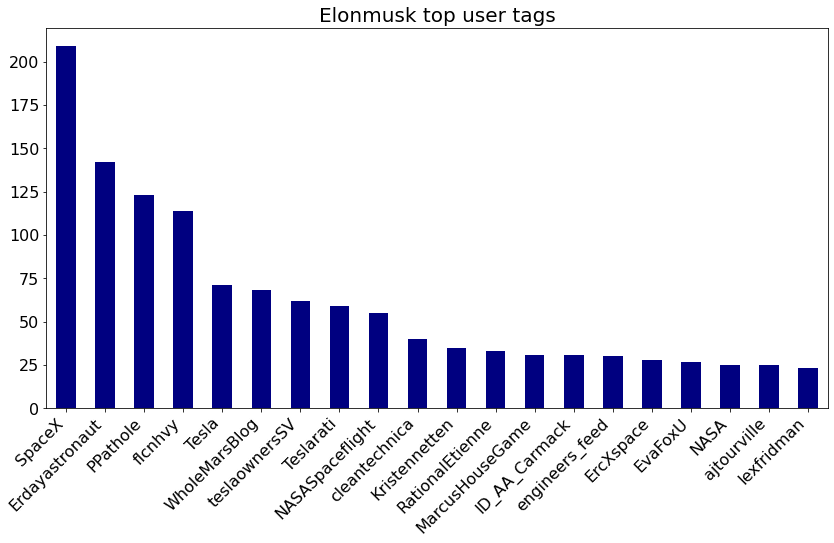

In [22]:
import itertools

c = list(
itertools.chain(
    *elon_musk_df.tweets.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='navy'
)
plt.gca().set_title('Elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

# Text Processing

***
**Collecting all the Tweets for Textual Pre-Processing**
***

In [23]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [24]:
elon_musk_df['text'] = elon_musk_df.tweets.apply(clean)
elon_musk_df.tweets

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: tweets, Length: 1999, dtype: object

In [25]:
elon_musk_tweets=[Text.strip() for Text in elon_musk_df.tweets] # remove both the leading and the trailing characters
elon_musk_tweets=[Text for Text in elon_musk_tweets if Text] # removes empty strings, because they are considered in Python as False
elon_musk_tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

***Combining all the Tweets into Text***

In [26]:
# Joining the list into one string/text
tweets_text=' '.join(elon_musk_tweets)
tweets_text[:2000]


'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

***Using TweetTokenizer to remove all the Twitter Username Handles***

In [27]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens[:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with']


In [28]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

***Removing all the Punctuations fromt the Combined Text***

In [29]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

***Removing all the URL's from the Text***

In [30]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

***Tokenizing Text into individual words for further pre-processing***

In [31]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be']


In [32]:
# Tokens count
len(text_tokens)

17847

***Removing the Stopwords from the Text***

In [33]:
given_stop_words = pd.read_csv('stop.csv',header=None)
given_stop_words

,0
0,stop_words
1,a
2,a's
3,able
4,about
...,...
567,yours
568,yourself
569,yourselves
570,z


In [34]:
my_stop_words = np.array(given_stop_words[0])
my_stop_words

array(['stop_words', 'a', "a's", 'able', 'about', 'above', 'according',
       'accordingly', 'across', 'actually', 'after', 'afterwards',
       'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost',
       'alone', 'along', 'already', 'also', 'although', 'always', 'am',
       'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody',
       'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere',
       'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't",
       'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at',
       'available', 'away', 'awfully', 'b', 'be', 'became', 'because',
       'become', 'becomes', 'becoming', 'been', 'before', 'beforehand',
       'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best',
       'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c',
       "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause',
       'causes', 'certain', 'certainly', 'changes', 'clearly', 'co',
 

In [35]:
# Remove Stopwords

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
np.append(my_stop_words,sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['I', '\x92', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'year', 'Now', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'fail', 'Himself', 'Haha', 'Indeed', 'Tweets', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'Just', 'Just', 'agree', 'Clubhouse', 'It', '\x92', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'issues', 'sentencing', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'U0001F923', 'U0001F923', 'This', 'true', 'power', 'haha', 'Any', 'crypto', 'wallet', 'won', '\x92', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'elements', 'lunar', 'Gateway', 'mission', 'Yes', 'Once', 'predict', 'cash', 'flow', 'Starlink', 'IPO', 'Starlink']


***Making all the Text into Lowercase***

In [36]:
# Making the Text in Lowercase
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])


['i', '\x92', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'now', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'fail', 'himself', 'haha', 'indeed', 'tweets', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'just', 'just', 'agree', 'clubhouse', 'it', '\x92', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'issues', 'sentencing', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'won', '\x92', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'elements', 'lunar', 'gateway', 'mission', 'yes', 'once', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink']


***Stemming the Text using NLTK Library***

In [37]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['i', '\x92', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'now', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'fail', 'himself', 'haha', 'inde', 'tweet', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'just', 'just', 'agre', 'clubhous', 'it', '\x92', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'issu', 'sentenc', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'u0001f923', 'u0001f923', 'thi', 'true', 'power', 'haha', 'ani', 'crypto', 'wallet', 'won', '\x92', 'give', 'privat', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'element', 'lunar', 'gateway', 'mission', 'ye', 'onc', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink']


***Lemmatization of Text data using Spacy library***

In [38]:
!pip3 install -U spacy


Defaulting to user installation because normal site-packages is not writeable


In [39]:
import spacy

In [40]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

C:\Users\Vaibhavi\AppData\Roaming\Python\Python39\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


i  alien ray tracing cyberpunk hdr nextlevel have great interview doge underestimated congratulations tesla china amazing execution year now happy new year ox frodo underdoge all thought fail himself haha indeed tweets represent realworld time allocation the entertaining outcome just just agree clubhouse it  real bought dogecoin lil x toddler hodler he issues sentencing bit high thanks fixing please unlock account u0001f923 u0001f923 this true power haha any crypto wallet won  give private keys avoided costs your app sucks rt nasa selected falcon heavy launch elements lunar gateway mission yes once predict cash flow starlink ipo starlink


In [41]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:200])

['I', '\x92', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'great', 'interview', 'doge', 'underestimated', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'year', 'now', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'fail', 'himself', 'haha', 'indeed', 'tweet', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'just', 'just', 'agree', 'clubhouse', 'it', '\x92', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'issue', 'sentence', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'win', '\x92', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'element', 'lunar', 'gateway', 'mission', 'yes', 'once', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor',

In [42]:
clean_tweets=' '.join(lemmas)
clean_tweets[:2000]

'I \x92 alien ray trace cyberpunk hdr nextlevel have great interview doge underestimated congratulation tesla china amazing execution year now happy new year ox frodo underdoge all think fail himself haha indeed tweet represent realworld time allocation the entertaining outcome just just agree clubhouse it \x92 real buy dogecoin lil x toddler hodler he issue sentence bit high thank fix please unlock account u0001f923 u0001f923 this true power haha any crypto wallet win \x92 give private key avoid cost your app suck rt nasa select falcon heavy launch element lunar gateway mission yes once predict cash flow starlink ipo starlink staggeringly difficult technical economic endeavor however don spacex pass deep chasm negative cash flow year low cost ton carbon sequester net product make must scalable it \x92 mean price country only difference taxis ship this intend earth idea apply mar u0001f923 u0001f923 xprize team manage 100 m carbon capture prize everyone tesla receive stock my comp stoc

# Generate Word Cloud

In [43]:
from wordcloud import WordCloud 

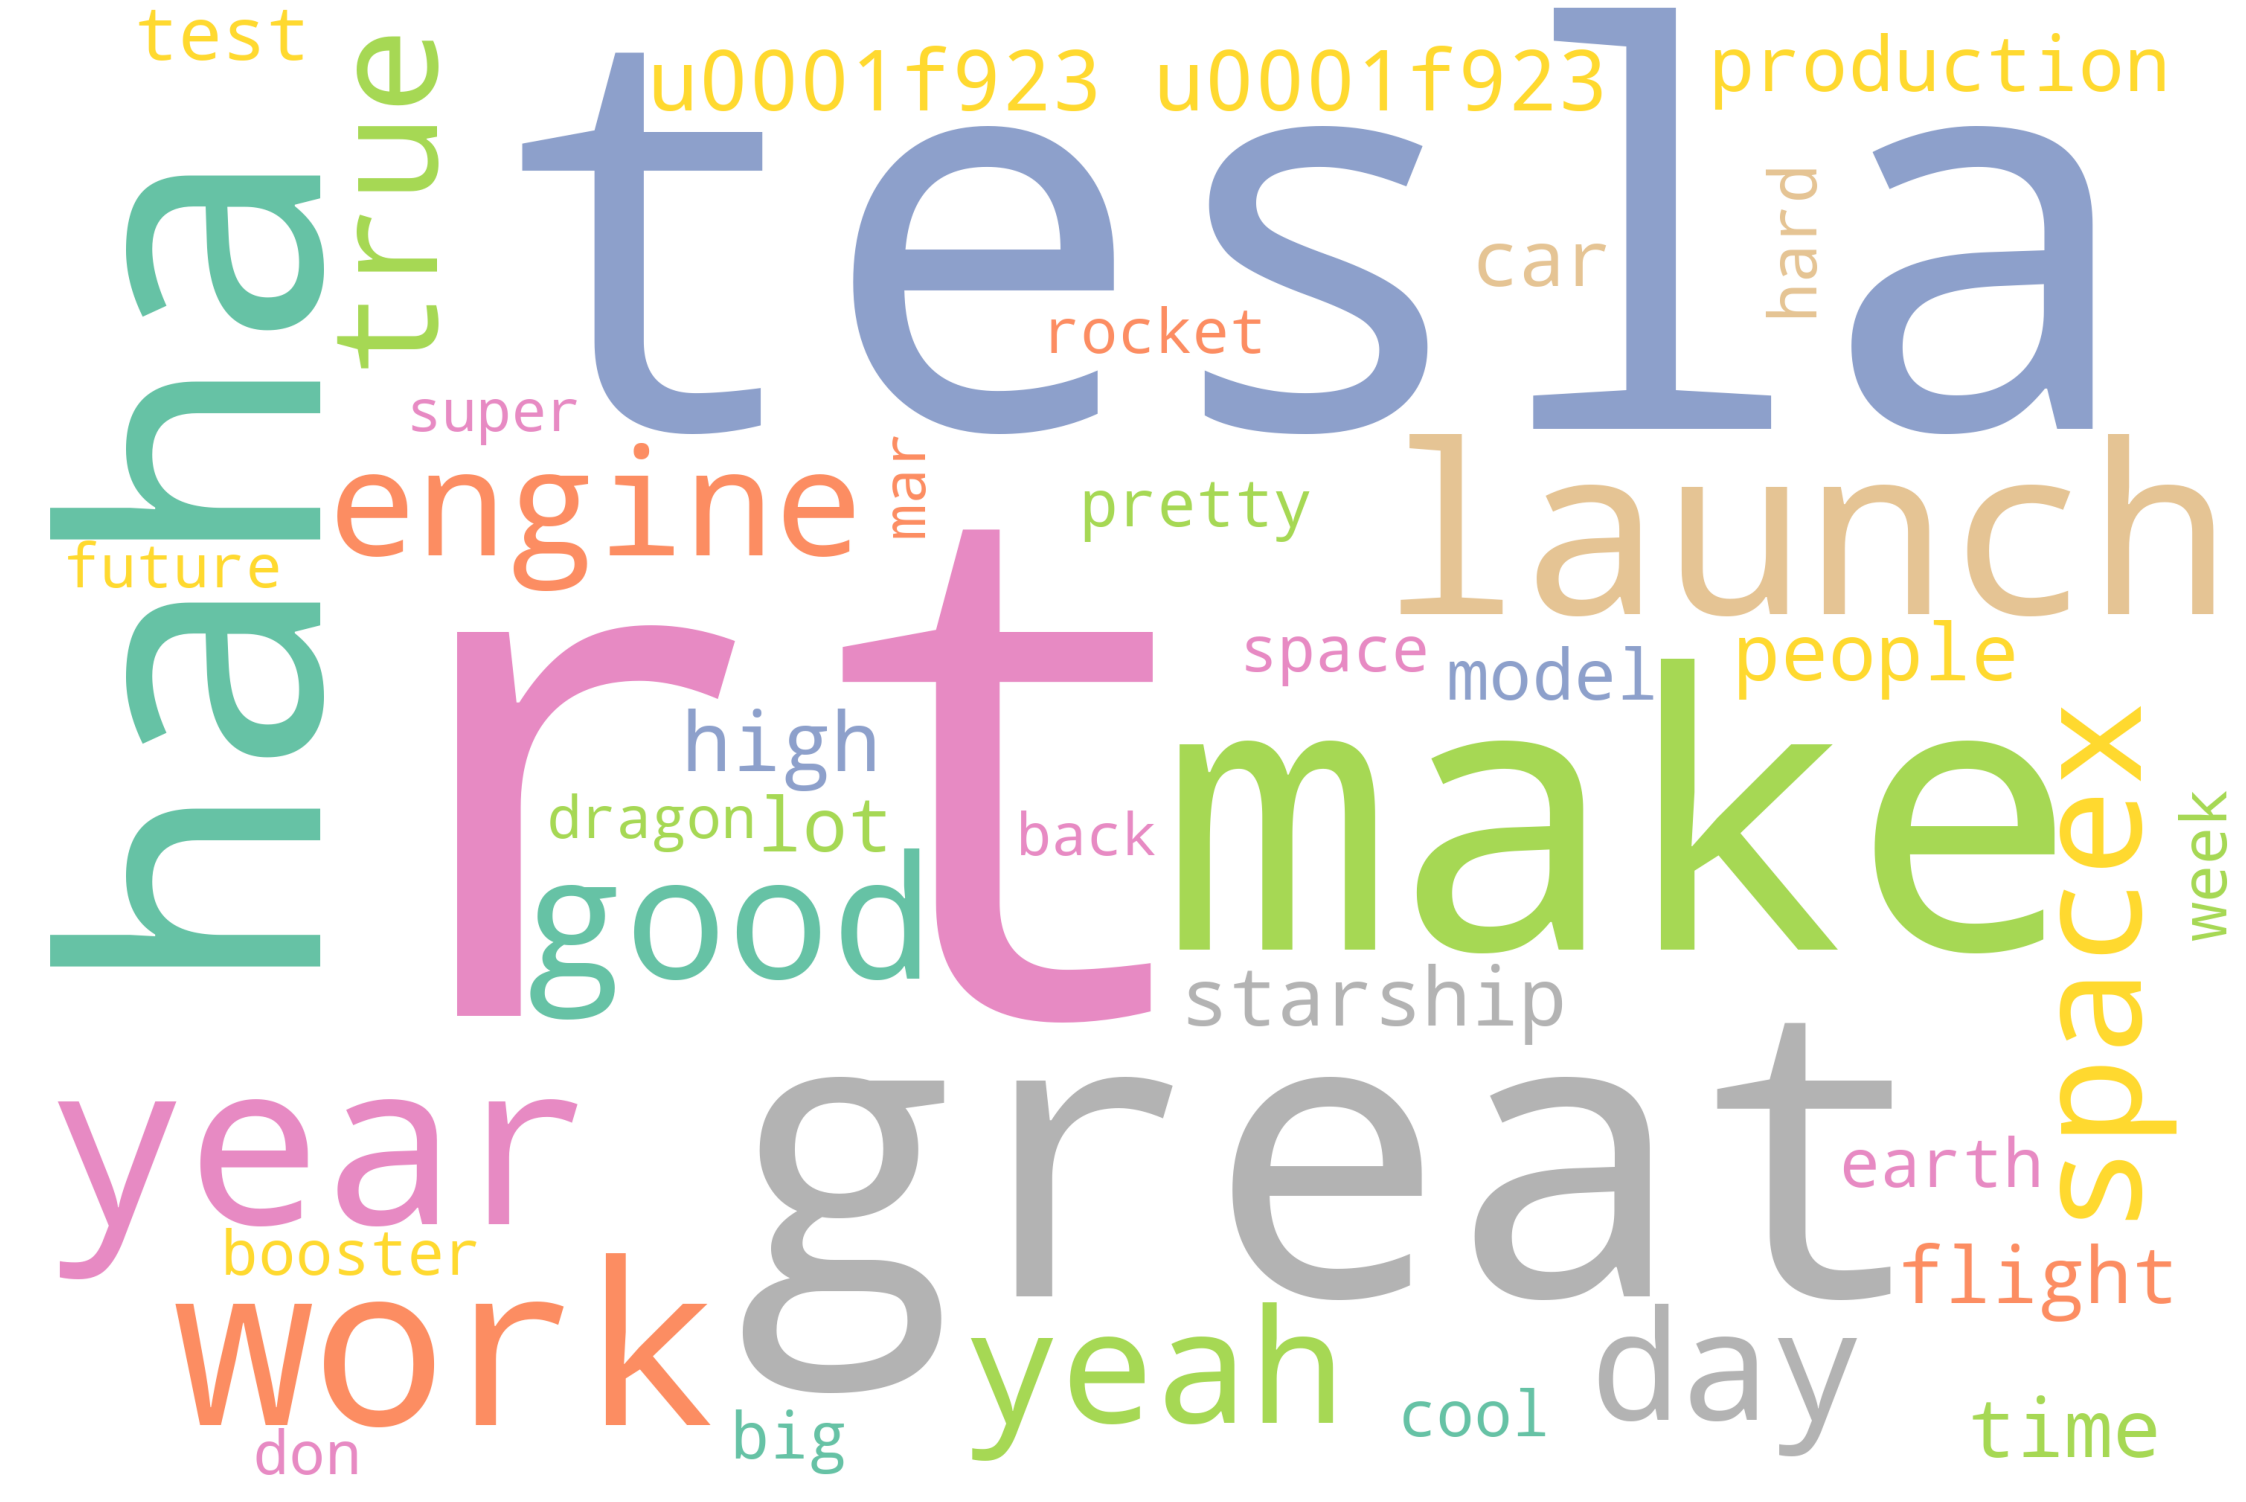

In [44]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=40,
                   colormap='Set2',stopwords=my_stop_words).generate(clean_tweets)
plot_cloud(wordcloud)

***Removing Names***

In [45]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [46]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
elon_musk_df['Tidy_Tweets'] = np.vectorize(remove_pattern)(elon_musk_df['tweets'], "@[\w]*")
elon_musk_df.head(10)

,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,Great interview!
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,Congratulations Tesla China for amazing execu...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,"Frodo was the underdoge,\nAll thought he would..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,Indeed! Tweets definitely do not represent r...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,The most entertaining outcome is the most likely


***Removing links (http | https)***

In [47]:
cleaned_tweets = []

for index, row in elon_musk_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Tidy_Tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

elon_musk_df['Tidy_Tweets'] = cleaned_tweets
elon_musk_df.head(10)


,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,Great interview!
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,"Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,The most entertaining outcome is the most likely


***Removing tweets with empty text***

In [48]:
elon_musk_df = elon_musk_df[elon_musk_df['Tidy_Tweets']!='']
elon_musk_df.head(10)

,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,Great interview!
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,"Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,The most entertaining outcome is the most likely


***Dropping duplicate rows***

In [49]:
elon_musk_df.drop_duplicates(subset=['Tidy_Tweets'], keep=False)
elon_musk_df.head(10)

,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,Great interview!
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,"Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,The most entertaining outcome is the most likely


***Resetting index***


In [50]:
elon_musk_df = elon_musk_df.reset_index(drop=True)
elon_musk_df.head(10)

,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,Great interview!
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,"Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,The most entertaining outcome is the most likely


***Removing Punctuations, Numbers and Special characters***

In [51]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [52]:
elon_musk_df['Tidy_Tweets'] = elon_musk_df['Tidy_Tweets'].apply(lambda x: clean_text(x))
elon_musk_df.head(10)

,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,great interview
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,congratulations tesla china for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,indeed tweets definitely do not represent real...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,the most entertaining outcome is the most likely


***Function to remove emoji***

In [53]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [54]:
elon_musk_df['Tidy_Tweets']=elon_musk_df['Tidy_Tweets'].apply(lambda x: remove_emoji(x))
elon_musk_df.head(10)

,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,great interview
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,congratulations tesla china for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,indeed tweets definitely do not represent real...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [55]:
elon_musk_df

,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,great interview
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,congratulations tesla china for amazing execut...
...,...,...,...,...,...,...,...,...
1933,"@flcnhvy True, it sounds so surreal, but the n...",23,144,12,1,2,flcnhvy true it sounds so surreal but the nega...,true it sounds so surreal but the negative pro...
1934,@PPathole Make sure to read ur terms &amp; con...,12,77,3,0,0,ppathole make sure to read ur terms amp condit...,make sure to read ur terms amp conditions befo...
1935,@TeslaGong @PPathole Samwise Gamgee,4,35,0,0,0,teslagong ppathole samwise gamgee,samwise gamgee
1936,@PPathole Altho Dumb and Dumber is <U+0001F525...,7,59,2,0,0,ppathole altho dumb and dumber is,altho dumb and dumber is


***Removing Stop words***

In [56]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in elon_musk_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Tidy_Tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
elon_musk_df['absolute_tidy_tweets'] = cleaned_tweets
elon_musk_df.head(10)

,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets,absolute_tidy_tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,great interview,great interview
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,happy new year of the ox,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,frodo was the underdoge all thought he would f...,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,haha thanks,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,indeed tweets definitely do not represent real...,indeed tweets definitely represent realworld t...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely


***Tokenize 'absolute_tidy_tweets'***

In [57]:
tokenized_tweet = elon_musk_df['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0                                         [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulations, tesla, china, amazing, execu...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweets, definitely, represent, realwo...
9                      [entertaining, outcome, likely]
Name: absolute_tidy_tweets, dtype: object

***Converting words to Lemma***

In [58]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [59]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                         [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulation, tesla, china, amazing, execut...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweet, definitely, represent, realwor...
9                      [entertaining, outcome, likely]
Name: absolute_tidy_tweets, dtype: object

***Joining all tokens into sentences***

In [61]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

elon_musk_df['absolute_tidy_tweets'] = tokenized_tweet
elon_musk_df.head(10)


,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets,absolute_tidy_tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,great interview,great interview
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,congratulations tesla china for amazing execut...,congratulation tesla china amazing execution l...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,happy new year of the ox,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,frodo was the underdoge all thought he would f...,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,haha thanks,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,indeed tweets definitely do not represent real...,indeed tweet definitely represent realworld ti...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely


#  Feature Extaction

***Applying Bag of Words without N grams***

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [63]:
print(cv.get_feature_names()[0:100])

['000', '005', '10', '100', '1000', '10000', '107', '10x', '11', '12', '122', '13', '130', '14', '140', '149', '15', '150', '155', '16', '162', '17', '18', '1880s', '1b', '1st', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240', '25', '250', '250kw', '25gunsteslacom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445', '448', '4530', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
print(cv.get_feature_names()[100:200])

['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'aiming', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'all', 'allocati', 'allocation', '

In [65]:
print(cv.get_feature_names()[200:300])

['almost', 'aloha', 'alpha', 'already', 'also', 'altho', 'although', 'altit', 'altitude', 'alto', 'aluminum', 'amaze', 'amazing', 'amazon', 'america', 'american', 'amount', 'amplification', 'amplitude', 'an', 'analog', 'analysis', 'anasisii', 'ancient', 'and', 'andrej', 'angle', 'annihila', 'announce', 'annoy', 'anode', 'another', 'answer', 'antenna', 'antibody', 'any', 'anyone', 'anytime', 'aok', 'apart', 'apogee', 'apologist', 'app', 'appeal', 'appear', 'apple', 'apply', 'appreciate', 'approach', 'approval', 'approve', 'approximate', 'approximately', 'approximation', 'april', 'aquatic', 'arbeit', 'arbeiten', 'arbiter', 'architectural', 'architecture', 'area', 'aren', 'argument', 'arise', 'arm', 'armor', 'array', 'arrive', 'art', 'article', 'as', 'ascent', 'ascribe', 'asimilar', 'asimov', 'aspire', 'assessment', 'assure', 'ast', 'asteroid', 'astronaughty', 'astronaut', 'astronauts', 'astronomer', 'astronomical', 'astronomy', 'at', 'atmosphere', 'atmospheric', 'atom', 'atrisk', 'attach

***CountVectorizer with N-grams (Bigrams & Trigrams)***

In [66]:
!pip install tqdm



Defaulting to user installation because normal site-packages is not writeable


In [67]:
from tqdm.notebook import *

In [68]:

ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(elon_musk_df))):
    review = re.sub('[^a-zA-Z]', ' ', elon_musk_df['absolute_tidy_tweets'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1938 [00:00<?, ?it/s]

In [69]:
corpus[10],corpus[15],corpus[20]

('sent', 'thank fix', 'app suck')

In [70]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [71]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
X.shape

(1938, 5000)

In [73]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [74]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,aber,abl,abort,absolut,absurd,acceler,accept,access,accur,achiev,...,year get,year support,year sure,yesterday,yet,yup,zero,zero death,zero death oct,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1934,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Counting all the nouns and verbs present in the Tokens of words

In [75]:
# Filtering the nouns and verbs only
one_block=clean_tweets
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['booster', 'mass', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'doge', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'note', 'email', 'text', 'learn', 'earth', 'time', 'story', 'tesla', 'read', 'kingdom', 'hear', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'ship', 'landing', 'burn', 'solution', 'greate', 'gas', 'maneuvering', 'rcs', 'thruster', 'raptor', 'launch', 'collect', 'galaxy', 'explore', 'falcon', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', '\x92', 'default', 'engine', 'arm', 'shut', 'engine', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'meme', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'dumb', 'time', 'pull', 'method', 'lows', 'doge', 'dogecoin', 'people', 'crypto', 'ur', 'outcome', 'sea', 'wind', 'watch']


In [76]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:20] # viewing top tweenty results

,word,count
0,launch,64
1,make,64
2,year,49
3,work,48
4,day,37
5,engine,36
6,time,35
7,starship,33
8,people,32
9,car,31


<AxesSubplot:title={'center':'Top 20 nouns and verbs'}, xlabel='word'>

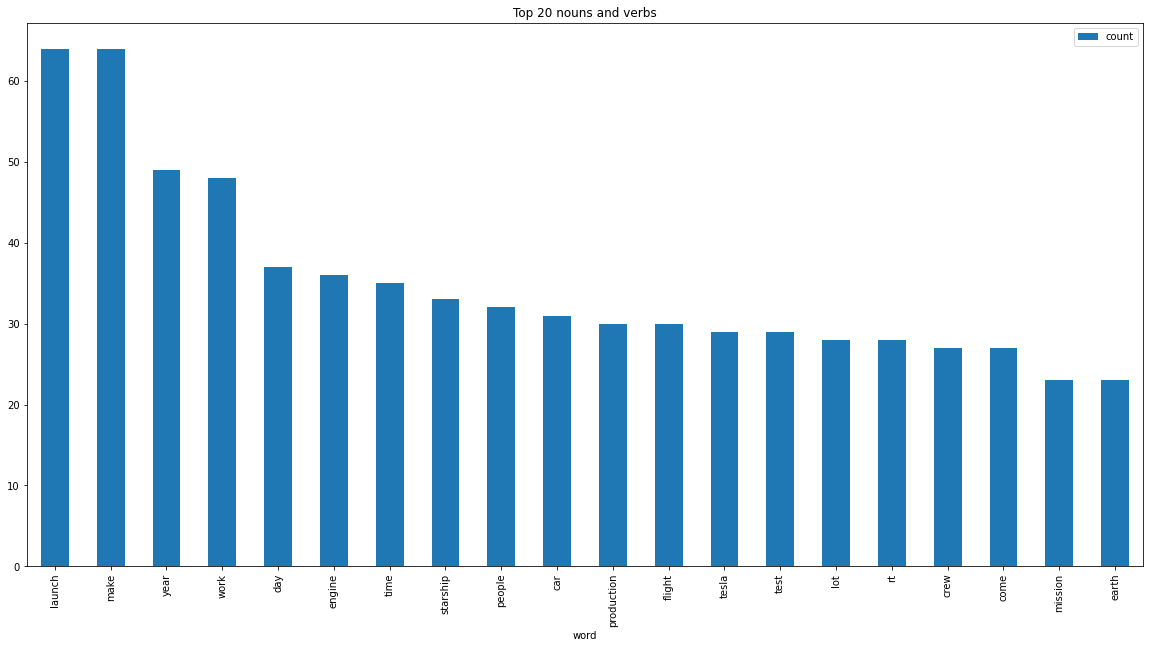

In [77]:
wd_df[0:20].plot.bar(x='word',figsize=(20,10),title='Top 20 nouns and verbs')

# Fetching Sentiments from Tweets

In [78]:
!pip3 install -U textblob

Defaulting to user installation because normal site-packages is not writeable


In [79]:
from textblob import TextBlob

In [80]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [81]:
sentiments_using_SIA = elon_musk_df.absolute_tidy_tweets.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,absolute_tidy_tweets
pos,1739
neg,199


In [82]:
elon_musk_df.head(10)

,tweets,word_count,char_count,stopwords,postive_words,negative_words,text,Tidy_Tweets,absolute_tidy_tweets
0,@kunalb11 Im an alien,4,22,1,0,0,im an alien,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5,0,0,idaacarmack ray tracing on cyberpunk with hdr ...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,4,35,0,0,0,joerogan spotify great interview,great interview,great interview
3,@gtera27 Doge is underestimated,4,31,1,0,0,doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,8,1,0,teslacn congratulations tesla china for amazin...,congratulations tesla china for amazing execut...,congratulation tesla china amazing execution l...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,2,0,0,happy new year of the ox,happy new year of the ox,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",12,96,6,0,0,frodo was the underdoge\nall thought he would ...,frodo was the underdoge all thought he would f...,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,1,0,0,owensparks flcnhvy haha thanks,haha thanks,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,3,0,0,flcnhvy indeed tweets definitely do not repre...,indeed tweets definitely do not represent real...,indeed tweet definitely represent realworld ti...
9,The most entertaining outcome is the most likely,8,48,5,1,0,the most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely


In [83]:
!pip3 install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [84]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [85]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [86]:
elon_musk_df.absolute_tidy_tweets[2]

'great interview'

In [87]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(elon_musk_df.absolute_tidy_tweets[2])

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

In [88]:
elon_musk_df.absolute_tidy_tweets[15]

'thanks fixing'

In [89]:
sid.polarity_scores(elon_musk_df.absolute_tidy_tweets[15])

{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

In [90]:
elon_musk_df.absolute_tidy_tweets[6]

'frodo underdoge thought would fail'

In [91]:
sid.polarity_scores(elon_musk_df.absolute_tidy_tweets[6])

{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.5423}

In [92]:
score_df=pd.DataFrame()
score_df['Tweets'] = elon_musk_df.absolute_tidy_tweets
score_df['scores'] = elon_musk_df['Tidy_Tweets'].apply(lambda review: sid.polarity_scores(review))
score_df.head()

,Tweets,scores
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."


In [93]:
score_df['compound']  = score_df['scores'].apply(lambda scores: scores['compound'])
score_df.head()

,Tweets,scores,compound
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271


In [94]:
score_df['sentiment'] = score_df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
score_df

,Tweets,scores,compound,sentiment
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,Negative
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271,Positive
...,...,...,...,...
1933,true sound surreal negative propaganda still a...,"{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",-0.4215,Negative
1934,make sure read ur term amp condition clicking ...,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.5994,Positive
1935,samwise gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1936,altho dumb dumber,"{'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'comp...",-0.7003,Negative


In [95]:
score_df.groupby('sentiment').count()['Tweets'].reset_index().sort_values(by='Tweets',ascending=False)

,sentiment,Tweets
2,Positive,873
1,Neutral,836
0,Negative,229


<AxesSubplot:xlabel='sentiment', ylabel='count'>

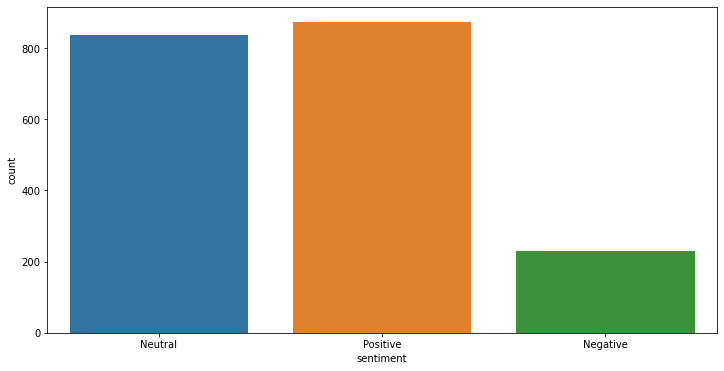

In [96]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=score_df)

In [97]:
score_df['compound'].sort_values(ascending=False)

1312    0.9325
1131    0.9274
744     0.9055
440     0.9022
1260    0.8996
         ...  
1027   -0.7430
1877   -0.7650
1483   -0.8020
1034   -0.8047
176    -0.8442
Name: compound, Length: 1938, dtype: float64

In [98]:
score_df[score_df['compound']>0.89]

,Tweets,scores,compound,sentiment
440,get absurdly good tesla aiautopilot engineerin...,"{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'comp...",0.9022,Positive
744,privilege work people like amp respect much fe...,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.9055,Positive
1131,thanks tesla team great work delivery new owne...,"{'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'comp...",0.9274,Positive
1142,falcon launch s super cool interstellar mappi...,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",0.8957,Positive
1260,one way another excitement guaranteed support ...,"{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...",0.8996,Positive
1312,great trip germany support government amp peop...,"{'neg': 0.0, 'neu': 0.364, 'pos': 0.636, 'comp...",0.9325,Positive
1539,rate improvement original gpt impressive rate ...,"{'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'comp...",0.8910,Positive


In [99]:
score_df[score_df['compound']<-0.73]

,Tweets,scores,compound,sentiment
176,also road hell mostly paved bad intention,"{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'comp...",-0.8442,Negative
1027,crash absorption rail cut amp replaced bolted ...,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",-0.7430,Negative
1034,model production ramp sheer agony two year die te,"{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'comp...",-0.8047,Negative
1345,people extremely unlikely die alone,"{'neg': 0.435, 'neu': 0.565, 'pos': 0.0, 'comp...",-0.7322,Negative
1483,early investor part tesla wrong b pushed ebe...,"{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'comp...",-0.8020,Negative
1877,population collapse biggest danger civilizatio...,"{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'comp...",-0.7650,Negative
1914,death loss information,"{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'comp...",-0.7351,Negative
